In [10]:
#Title :  Data Analysis using Building_Energy_Benchmarking Dataset 
# Part 1: Data Cleaning and Preprocessing
       # 1.1 Load and Inspect the Dataset
       # 1.2 Handling Missing Data
       # 1.3 Extracting and Cleaning Data Using Regex

# 1.1 Load and Inspect the Dataset
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
Energy_data = pd.read_csv('Building_Energy_Benchmarking.csv')
df = pd.DataFrame(Energy_data)
shape=df.shape
print("Building_Energy_Benchmarking Dataset shape is: ",shape)
# print column and datatype both
data_type = df.info()
#calculate % missing value per column 
percentage_value=df.isna().mean()*100
print("% missing value per column is :")
print(percentage_value)

Building_Energy_Benchmarking Dataset shape is:  (494, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Property Id                                                            494 non-null    int64  
 1   Property Name                                                          494 non-null    object 
 2   Address 1                                                              494 non-null    object 
 3   City                                                                   494 non-null    object 
 4   Postal Code                                                            494 non-null    object 
 5   Province                                                               494 non-null    object 
 6   Primary Property Type - Self Sel

In [11]:
# 1.2 Handling Missing Data
#drop columns or rows with more than 40% missing values. 
drop40 = df.drop(percentage_value[percentage_value>40].index,axis=1)
display(drop40.shape)

# Fill missing values
for col in drop40.columns:
  if drop40[col].dtype == 'object': # fill missing value in numerical columns with median
    drop40[col].fillna(drop40[col].mode()[0], inplace=True)
  else:
    drop40[col].fillna(drop40[col].median(), inplace=True) # fill missing value in categorical columns with mode

print("DataFrame after imputing missing values:")
display(drop40)

(494, 26)

<ipython-input-11-ef1fcdbefcce>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drop40[col].fillna(drop40[col].median(), inplace=True) # fill missing value in categorical columns with mode
<ipython-input-11-ef1fcdbefcce>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

DataFrame after imputing missing values:


,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,4.47,4.91,509,276.7,280,152.4,368616,5453,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,1.57,1.64,920,118.4,243,31.2,1091854,4725,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0.94,1.00,499,74.6,0,0.0,508589,3,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,0.97,1.04,1293,74.0,26,1.5,1152308,506,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,4.00,4.27,568,265.2,253,118.1,508594,4926,2023,2023-21988603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,21988624,Senior Services,311 34 AV SE,Calgary,T2G 1T7,Alberta,Office,1,1960,768,...,1.57,1.64,66,86.3,50,65.6,25615,980,2022,2022-21988624
490,21988625,Fire Station #25,4705 76 AV SE,Calgary,T2C 2X1,Alberta,Fire Station,1,1982,1108,...,1.49,1.49,105,94.8,53,48.2,83298,1040,2022,2022-21988625
491,21988627,EMS #6,1940 WESTMOUNT BV NW,Calgary,T2N 3G8,Alberta,Other - Public Services,1,1964,425,...,2.27,2.37,53,124.8,40,94.5,20725,782,2022,2022-21988627
492,21988628,Fire Station #24,2607 106 AV SW,Calgary,T2W 4H7,Alberta,Fire Station,1,1978,1108,...,1.37,1.35,105,94.3,41,36.8,102861,794,2022,2022-21988628


In [18]:
#1.3 Extracting and Cleaning Data Using Regex

# Function to extract numeric values from text-based numeric columns

def rvumvalues(value):
    if isinstance(value, str):
        match = re.search(r"\d+\.?\d*", value)
        return float(match.group().replace(",", "")) 
    return None

# Applying rvumvalues functions
drop40["Property GFA - Self-Reported (m²)"] = drop40["Property GFA - Self-Reported (m²)"].apply(rvumvalues)
drop40["Site Energy Use (GJ)"] = drop40["Site Energy Use (GJ)"].apply(rvumvalues)
drop40["Total GHG Emissions (Metric Tons CO2e)"] = drop40["Total GHG Emissions (Metric Tons CO2e)"].apply(rvumvalues)
drop40["Direct GHG Emissions (Metric Tons CO2e)"] = drop40["Direct GHG Emissions (Metric Tons CO2e)"].apply(rvumvalues)
drop40["Electricity Use - Grid Purchase (kWh)"] = drop40["Electricity Use - Grid Purchase (kWh)"].apply(rvumvalues)
print(drop40[["Property GFA - Self-Reported (m²)", "Site Energy Use (GJ)","Total GHG Emissions (Metric Tons CO2e)","Direct GHG Emissions (Metric Tons CO2e)","Electricity Use - Grid Purchase (kWh)"]].head())
# Function to standardize postal codes to Canadian format A1A 1A1
def postalcode(code):
    if isinstance(code, str) and re.fullmatch(r"([A-Z]\d[A-Z])\s*(\d[A-Z]\d)", str(code)):
        return code[:3] + " " + code[3:] if " " not in code else code
    return None  # Invalid codes will be set to None

drop40["Postal Code"] = drop40["Postal Code"].apply(postalcode)
print(drop40[["Postal Code"]].head())

# Function to clean property names and addresses
def clean_text(value):
    if isinstance(value, str):
        return re.sub(r"[^a-zA-Z0-9\s]", "", value)  # Remove special characters
    return None


drop40["Property Name"] = drop40["Property Name"].apply(clean_text)
drop40["Address 1"] = drop40["Address 1"].apply(clean_text)
print(drop40[["Property Name", "Address 1"]].head())

   Property GFA - Self-Reported (m²)  Site Energy Use (GJ)  \
0                             1838.0                6780.0   
1                             7770.0                8656.0   
2                             6681.0                4014.0   
3                            17468.0               11237.0   
4                             2143.0                6757.0   

   Total GHG Emissions (Metric Tons CO2e)  \
0                                   509.0   
1                                   920.0   
2                                   499.0   
3                                  1293.0   
4                                   568.0   

   Direct GHG Emissions (Metric Tons CO2e)  \
0                                    280.0   
1                                    243.0   
2                                      0.0   
3                                     26.0   
4                                    253.0   

   Electricity Use - Grid Purchase (kWh)  
0                               3686

In [21]:
#Part 2: Exploratory Data Analysis (EDA) and Aggregations
#2.1 Statistical Summary

drop40.describe()

,Property Id,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Year Ending
count,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,1.308877e+07,1.060729,1980.091093,1974.198583,3586.745951,1.774798,1.810324,2.282753,2.319717,442.468623,158.671660,213.686235,63.821862,2.539227e+05,2020.995951
std,5.659556e+06,0.278281,25.159568,6799.500086,15596.320164,1.306700,1.331529,1.597846,1.622897,1078.852509,109.472637,713.805808,56.835735,8.348778e+05,1.414208
min,6.169481e+06,1.000000,1896.000000,1.000000,1.000000,0.060000,0.060000,0.110000,0.110000,1.000000,10.200000,0.000000,0.000000,1.000000e+00,2019.000000
25%,9.563763e+06,1.000000,1970.000000,2.000000,3.000000,0.990000,1.000000,1.312500,1.350000,77.125000,93.100000,41.000000,33.325000,1.132500e+02,2020.000000
50%,9.997794e+06,1.000000,1978.000000,216.950000,79.500000,1.290000,1.310000,1.680000,1.690000,173.000000,117.600000,74.000000,43.900000,4.620000e+02,2021.000000
75%,2.198860e+07,1.000000,1996.000000,1448.750000,1558.500000,2.065000,2.110000,2.622500,2.652500,446.200000,186.975000,223.075000,74.050000,1.491705e+05,2022.000000
max,2.198863e+07,3.000000,2018.000000,85941.000000,243202.000000,8.430000,8.360000,10.130000,10.060000,13067.000000,666.200000,12243.000000,386.000000,9.618602e+06,2023.000000


In [38]:
#2.2 Aggregations
#Compute the average Energy Use Intensity (EUI) by Property Type
avgeui = drop40.groupby("Primary Property Type - Self Selected")["Site EUI (GJ/m²)"].mean()
display(avgeui)

Primary Property Type - Self Selected
Distribution Center                                 3.286000
Fire Station                                        1.208827
Fitness Center/Health Club/Gym                      4.385000
Heated Swimming Pool                                4.805333
Ice/Curling Rink                                    2.182200
Indoor Arena                                        1.106000
Mixed Use Property                                  0.458000
Museum                                              1.584000
Non-Refrigerated Warehouse                          0.768000
Office                                              1.519636
Other                                               0.070000
Other - Public Services                             1.526000
Other - Recreation                                  2.165000
Performing Arts                                     1.302000
Repair Services (Vehicle, Shoe, Locksmith, etc.)    1.248000
Self-Storage Facility                          

In [37]:
#Compute the total Greenhouse Gas (GHG) emissions by year
totalghg = drop40.groupby("Year Ending")["Total GHG Emissions (Metric Tons CO2e)"].sum()
display(totalghg)

Year Ending
2019    22799.1
2020    24036.9
2021    24310.5
2022    72301.0
2023    75132.0
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

In [35]:
#Identify the top 5 properties with the highest total energy consumption.
#  Here I convert the 'Site Energy Use (GJ)' to numeric before using nlargest function
drop40["Site Energy Use (GJ)"] = pd.to_numeric(drop40["Site Energy Use (GJ)"])
top5 = drop40.nlargest(5, "Site Energy Use (GJ)")[["Property Name", "Site Energy Use (GJ)"]]
print("Top 5 Properties with Highest Total Energy Consumption")
display(top5)



Top 5 Properties with Highest Total Energy Consumption


,Property Name,Site Energy Use (GJ)
293,Stoney Transit Facility,243202.0
457,Stoney Transit Facility,160486.0
296,Village Square Leisure Centre,80302.0
307,Municipal Complex,79602.0
73,Municipal Complex,79343.0


In [42]:
#2.3 Detecting Outliers Using Regex and IQR
# Check for non-numeric values in numeric column  so define a function  numeric values using regex
def numeric(value):
    match = re.search(r"(\d+\.?\d*)", str(value))  # Extracts the first number found
    return float(match.group(1)) if match else np.nan  # Convert to float, else NaN

# Apply to numeric columns stored as objects (text)
cols = ["Property GFA - Self-Reported (m²)", 
                "Site Energy Use (GJ)", 
                "Total GHG Emissions (Metric Tons CO2e)",
                "Electricity Use - Grid Purchase (kWh)",
                "Natural Gas Use (GJ)"]

for col in cols:
    drop40[col] = drop40[col].apply(numeric)  # Convert extracted values to float

# Verify changes
print(drop40[cols].dtypes)  # Should all be float now

Property GFA - Self-Reported (m²)         float64
Site Energy Use (GJ)                      float64
Total GHG Emissions (Metric Tons CO2e)    float64
Electricity Use - Grid Purchase (kWh)     float64
Natural Gas Use (GJ)                      float64
dtype: object


In [45]:

# Compute IQR
Q1 = df["Total GHG Emissions (Metric Tons CO2e)"].quantile(0.25)
Q3 = df["Total GHG Emissions (Metric Tons CO2e)"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Replace outliers with the median value for that property type
medghg = drop40.groupby("Primary Property Type - Self Selected")["Total GHG Emissions (Metric Tons CO2e)"].median()
drop40.loc[drop40["Total GHG Emissions (Metric Tons CO2e)"] < lb, "Total GHG Emissions (Metric Tons CO2e)"] = drop40["Primary Property Type - Self Selected"].map(medghg)
drop40.loc[drop40["Total GHG Emissions (Metric Tons CO2e)"] > ub, "Total GHG Emissions (Metric Tons CO2e)"] = drop40["Primary Property Type - Self Selected"].map(medghg)

# Display updated dataset
display(drop40["Total GHG Emissions (Metric Tons CO2e)"].describe())

count      494.000000
mean       442.468623
std       1078.852509
min          1.000000
25%         77.125000
50%        173.000000
75%        446.200000
max      13067.000000
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

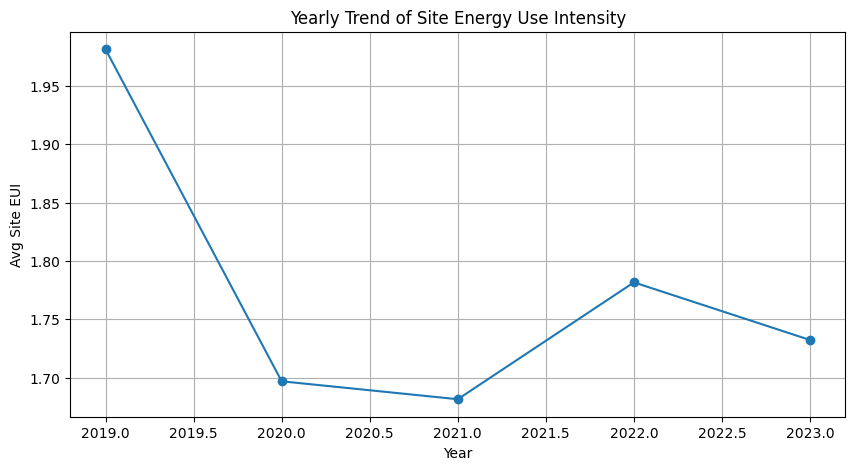

In [49]:
#Part 3: Data Visualization
#3.1 Time-Series Visualization
plt.figure(figsize=(10,5))
drop40.groupby("Year Ending")["Site EUI (GJ/m²)"].mean().plot(marker="o")
plt.xlabel('Year')
plt.ylabel('Avg Site EUI')
plt.title('Yearly Trend of Site Energy Use Intensity')
plt.grid(True)
plt.show()


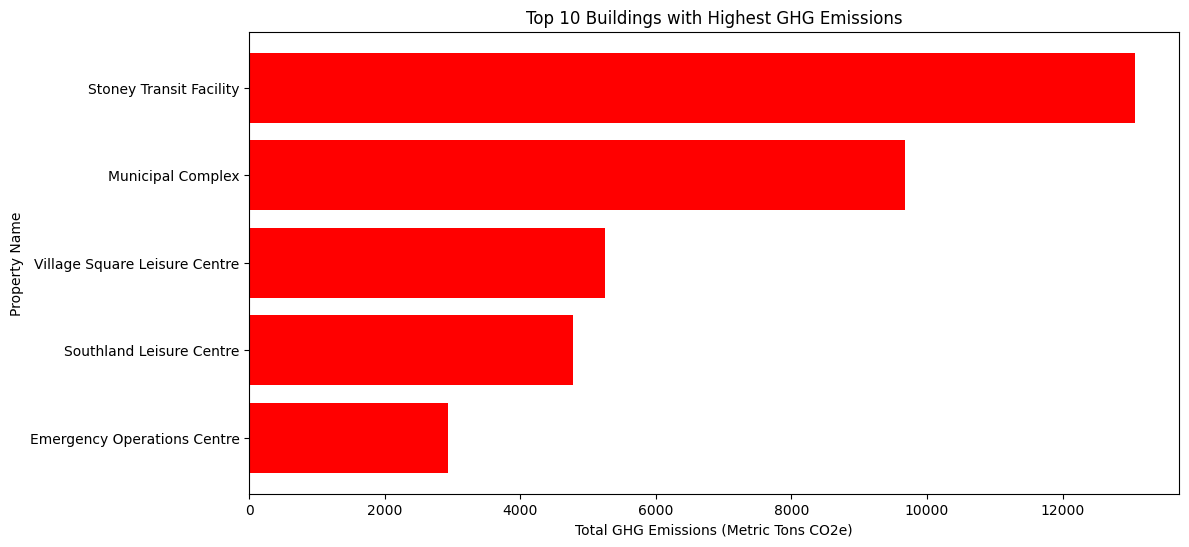

In [68]:
#3.2 Comparative Bar Charts
# Top 10 buildings with the highest GHG emissions
topghg = drop40.nlargest(10, "Total GHG Emissions (Metric Tons CO2e)")
plt.figure(figsize=(12, 6))
plt.barh(topghg["Property Name"], topghg["Total GHG Emissions (Metric Tons CO2e)"], color="Red")
plt.xlabel("Total GHG Emissions (Metric Tons CO2e)")
plt.ylabel("Property Name")
plt.title("Top 10 Buildings with Highest GHG Emissions")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest emitter on top




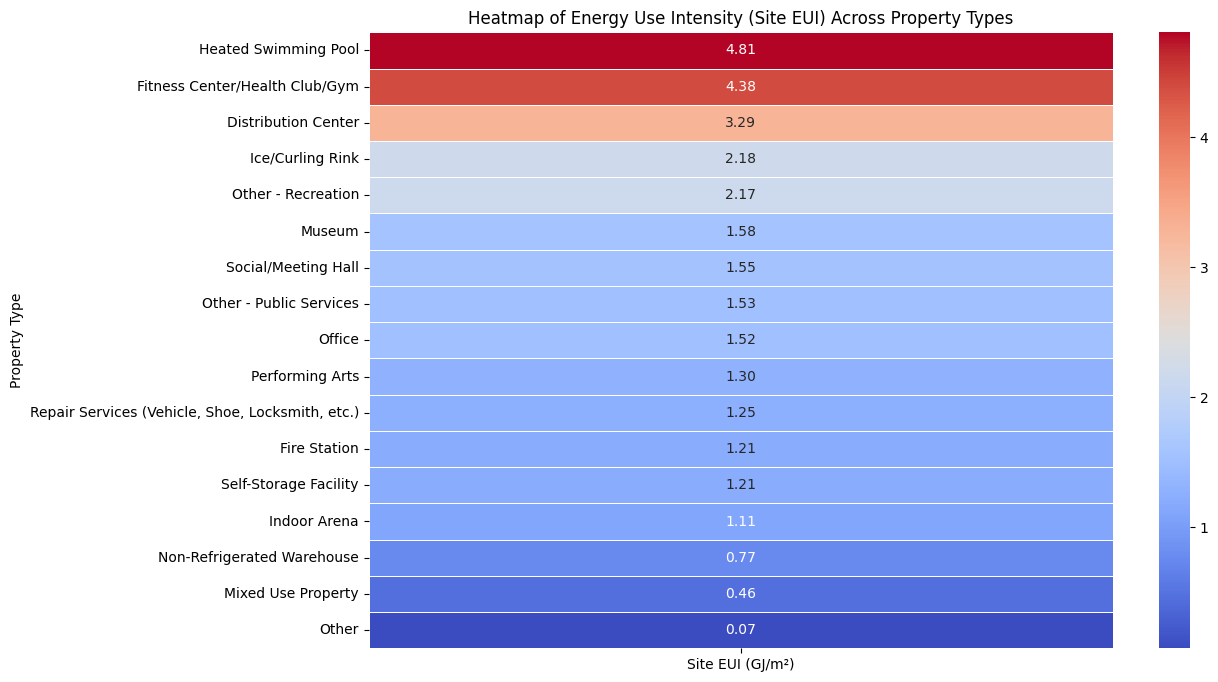

In [71]:
#3.3 Heatmap Visualization
import piplite
await piplite.install('seaborn')
import seaborn as sns
plt.figure(figsize=(12, 8))
property_type_eui = drop40.pivot_table(values="Site EUI (GJ/m²)", index="Primary Property Type - Self Selected", aggfunc="mean").sort_values(by="Site EUI (GJ/m²)", ascending=False)
sns.heatmap(property_type_eui, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Energy Use Intensity (Site EUI) Across Property Types")
plt.xlabel("")
plt.ylabel("Property Type")
plt.show()

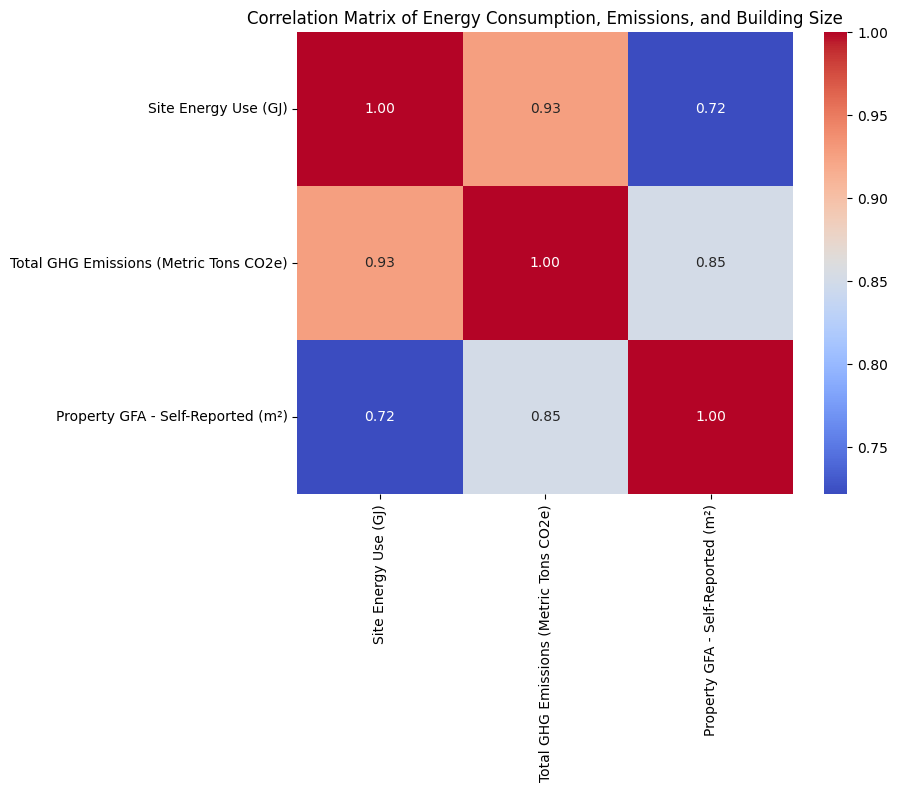

In [72]:
#Part 4: Further Analysis
#4.1 Correlation Analysis

matrix = drop40[["Site Energy Use (GJ)", "Total GHG Emissions (Metric Tons CO2e)", "Property GFA - Self-Reported (m²)"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Energy Consumption, Emissions, and Building Size")
plt.show()

In [74]:
# KEY OBSERVATIONS & IMPLICATIONS
# 1. Correlation between Site Energy use vs Total GHG Emmissions, higher energy consumption leads to higher GHG emmisions.
# 2. Positive correlation between Property GFA vs Site Energy use, larger buildings tend to consume more enrgy.


In [76]:
# Conduct a t-test comparing the Energy Star Score between Offices and Residential Buildings
# Check if Energy Star Score is in the data.columns
if "ENERGY STAR Score" in drop40.columns:
    office_scores = drop40[drop40["Primary Property Type - Self Selected"] == "Office"]["ENERGY STAR Score"].dropna()
    residential_scores = drop40[drop40["Primary Property Type - Self Selected"] == "Multifamily Housing"]["ENERGY STAR Score"].dropna()
else:
    print(f"Column 'ENERGY STAR Score' not found. Available columns: {drop40.columns.tolist()}")
    # Exit or handle the error appropriately (e.g., skip this section)

# If the column exists, proceed with the t-test
if "ENERGY STAR Score" in drop40.columns:
    !pip install scipy
    import scipy.stats as stats
    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(office_scores, residential_scores, nan_policy='omit')

    # Display results
    print("T-Test Results:")
    print(f"T-Statistic: {t_stat:.3f}")
    print(f"P-Value: {p_value:.3f}")

Column 'ENERGY STAR Score' not found. Available columns: ['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code', 'Province', 'Primary Property Type - Self Selected', 'Number of Buildings', 'Year Built', 'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)', 'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)', 'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)', 'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)', 'Total GHG Emissions (Metric Tons CO2e)', 'Total GHG Emissions Intensity (kgCO2e/m²)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions Intensity (kgCO2e/m²)', 'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)', 'Year Ending', 'Unique ID']
